# Z-test:
* A z-test is a statistical test used to determine whether there is a significant difference between sample and population means or between the means of two samples. It is applicable when the sample size is large (typically n > 30) or the population variance is known. The z-test is based on the standard normal distribution (z-distribution).
* Types of Z-tests:
  * One-Sample Z-test: Used to compare the sample mean to a known population mean.
  * Two-Sample Z-test: Used to compare the means of two independent samples.
  * Proportion Z-test: Used to compare sample proportions to population proportions or two sample proportions.
* Interpreting Results:
  * Calculate the z-score and compare it with the critical value from the standard normal distribution table (z-table) for a given significance level (commonly 0.05).
  * If the absolute value of the z-score is greater than the critical value, you reject the null hypothesis, indicating a significant difference.
  * If the absolute value of the z-score is less than the critical value, you fail to reject the null hypothesis, indicating no significant difference.


The z-test is useful for hypothesis testing when dealing with large sample sizes and known population variances, providing a straightforward method to determine statistical significance.


# T-test:
* It is very similar to Z-test
* It has only one difference, for Z-test we need population std dev(σ), but if we don't have population std dev(σ) then we apply T-test. In that case we have sample std dev given.
* It also works well with smaller sample sizes.
* In Z-test, to calculate Z-statistic we use normal distribution, for T-test we use t-distribution.
* It only works in case of two categories, in case of more than two cases we use other tests like ANOVA, etc.

* **A more formal definition**: A t-test is a statistical test used in hypothesis testing to compare the means of two samples or to compare a sample mean to a known population mean. The t-test is based on the t-distribution, which is used when the population standard deviation is unknown and the sample size is small.

There are three main types of t-tests:
1. **One-sample t-test**: The one-sample t-test is used to compare the mean of a single sample to a known population mean. The null hypothesis states that there is no significant difference between the sample mean and the population mean, while the alternative hypothesis states that there is a significant difference.

2. **Independent two-sample t-test**: The independent two-sample t-test is used to compare the means of two independent samples. The null hypothesis states that there is no significant difference between the means of the two samples, while the alternative hypothesis states that there is a significant difference.

3. **Paired t-test (dependent two-sample t-test)**: The paired t-test is used to compare the means of two samples that are dependent or paired, such as pre-test and post-test scores for the same group of subjects or measurements taken on the same subjects under two different conditions. The null hypothesis states that there is no significant difference between the means of the paired differences, while the alternative hypothesis states that there is a significant difference.


## 1. Single Sample t-test:

A one-sample t-test checks whether a sample mean differs from the population mean.

Assumptions for a single sample t-test
1. **Normality** - Population from which the sample is drawn is normally distributed
2. **Independence** - The observations in the sample must be independent, which means that the value of one observation should not influence the value of another observation.
3. **Random Sampling** - The sample must be a random and representative subset of the population.
4. **Unknown population std** - The population std is not known.


### Example:
Suppose a manufacturer claims that the average weight of their new chocolate bars is 50
grams, we highly doubt that and want to check this so we drew out a sample of 25 chocolate
bars and measured their weight, the sample mean came out to be 49.7 grams and the sample
std deviation was 1.2 grams. Consider the significance level to be 0.05

**Solution**:

Given values:
        
        population mean(μ) = 50
        n = 25
        sample mean (x̄) = 49.7
        sample std dev(s) = 1.2
        α = 0.05
        
* H0 => μ=50
* Ha =>| μ ≠ 50


* Here we cannot apply central limit theorem as n<30 or if we had weight of samples then we could have done normality test, but we cannot do it. So for now we will assume that it normally distributed.
* Now our test-statistic is `t`, we calculate it by:

        t = (x̄ - μ) / (s/sqrt(n)) = -1.25
        
* We will plot this point in our t-distribution, and as it is two tailed test so we will plot on both sides, and we need to find the shaded area, and when we add shaded area we get our p-value.
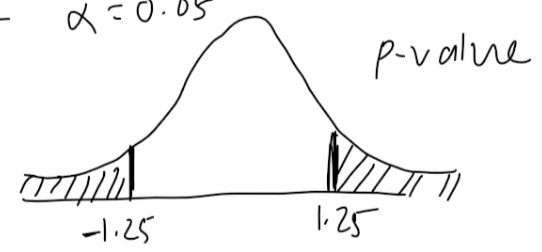

* We look at t-table, we need degree of freedom to look at it; degree of freedom is n-1 i.e. 25 -1 = 24. But instead of t-table we could use CDF, **CDF will give LHS area of a point**.


In [2]:
from scipy.stats import t

# Set the t-value and degrees of freedom
t_value = -1.25
df = 24

# Calculate the CDF value
cdf_value = t.cdf(t_value, df)
print(cdf_value)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
0.1116757390828102


So area of LHS shaded area is 0.11 and RHS shaded area is also 0.11, so our p-value will be:
    
    0.11 + 0.11 = 0.22
    
Since, p-value > significance value; 0.22 > 0.05, we failed to reject null hypothesis.



### Shapiro Wilk Test:
* In above example we assume that distribution is normal distribution, but actually when working on problems we need to proof that samples follow normality, how can we do it? We can perform a test called **Shapiro Wilk Test**.
* This test takes samples(or some numbers) and tells whether those samples follows normal distribution or not

In [14]:
from scipy.stats import shapiro

sample_ages = np.array([24, 45 , 40 , 43 , 27 , 23 , 19 , 28 , 46 , 23 , 32.5, 36 , 18.5, 22 , 27 , 35 , 34 , 28 , 26 , 26 , 12 , 18 , 26 , 22 , 35 ])
shapiro_age = shapiro(sample_ages)
print(shapiro_age)


ShapiroResult(statistic=0.9592477083206177, pvalue=0.39969396591186523)


From here we get p-value and we can say if:

**p-value < 0.05(significance value), then we can say it does not follows normal distribution**

**p-value > 0.05(significance value), then we can say it follows normal distribution**


So in this case, 0.399 > 0.05, sample data is normally distributed


### Now let's see how to do T-test using python:

In [19]:
# To convert number in e format to normal
# l =7.841888916004791e-09
# print ("%.16f" % l)


import scipy.stats as stats

# Let's consider few values:
pop_mean = 35

# To perform single sample t-test:
t_statistic, p_value = stats.ttest_1samp(sample_ages, pop_mean)

print("t-statistic: ", t_statistic)
print("p-value: ", p_value/2) # Dividing by 2, as we are performing 1-tailed test

t-statistic:  -3.6032789492630215
p-value:  0.0007129622534167821


In [20]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis.


## 2. Independent 2 sample t-test

An independent two-sample t-test, also known as an unpaired t-test, is a statistical method used to compare the means of two independent groups to determine if there is a significant difference between them.

*For eg: If in Titanic dataset, we need to check average age of male is greater than average age of females or not. Here we check two independent samples of male and female.*

**Assumptions for the test**:
1. **Independence of observations**: The two samples must be independent, meaning there is no relationship between the observations in one group and the observations in the other group. The subjects in the two groups should be selected randomly and independently.

2. **Normality**: The data in each of the two groups should be approximately normally distributed. The t-test is considered robust to mild violations of normality, especially when the sample sizes are large (typically n ≥ 30) and the sample sizes of the two groups are similar. If the data is highly skewed or has substantial outliers, consider using a non-parametric test, such as the Mann-Whitney U test.

3. **Equal variances (Homoscedasticity)**: The variances of the two populations should be approximately equal. This assumption can be checked using F-test for equality of variances. If this assumption is not met, you can use Welch's t-test, which does not require equal variances.
4. **Random sampling**: The data should be collected using a random sampling method from the respective populations. This ensures that the sample is representative of the population and reduces the risk of selection bias.


### Example:
Suppose a website owner claims that there is no difference in the average time spent on their website between desktop and mobile users. To test this claim, we collect data from 30 desktop users and 30 mobile users regarding the time spent on the website in minutes. The sample statistics are as follows:


desktop users = [12, 15, 18, 16, 20, 17, 14, 22, 19, 21, 23, 18, 25, 17, 16, 24, 20, 19, 22, 18, 15, 14, 23, 16, 12, 21, 19, 17, 20, 14]

mobile_users = [10, 12, 14, 13, 16, 15, 11, 17, 14, 16, 18, 14, 20, 15, 14, 19, 16, 15, 17, 14, 12, 11, 18, 15, 10, 16, 15, 13, 16, 11]


Calculating basic parameters from above list for Desktop users:
- Sample size (n1): 30
- Sample mean (mean1): 18.5 minutes
- Sample standard deviation (std_dev1): 3.5 minutes


Calculating basic parameters from above list for Mobile users:
- Sample size (n2): 30
- Sample mean (mean2): 14.3 minutes
- Sample standard deviation (std_dev2): 2.7 minutes


We will use a significance level (α) of 0.05 for the hypothesis test.



**Solution**:

To use Independent 2 sample t-test it should follow all those assumptions(mentioned above)

H0 => μd - μm = 0 // No difference in the avg time spent on their website between desktop and mobile users

H0 => μd = μm


Ha => μd ≠ μm

**Assumption 1**: Independence of observations: FOLLOWS

**Assumption 2**: Normally distributed

We will use shapiro will test to see if data is normally distributed:

In [28]:
from scipy.stats import shapiro

desktop_users = [12, 15, 18, 16, 20, 17, 14, 22, 19, 21, 23, 18, 25, 17, 16, 24, 20, 19, 22, 18, 15, 14, 23, 16, 12, 21, 19, 17, 20, 14]

mobile_users = [10, 12, 14, 13, 16, 15, 11, 17, 14, 16, 18, 14, 20, 15, 14, 19, 16, 15, 17, 14, 12, 11, 18, 15, 10, 16, 15, 13, 16, 11]

# Perform the Shapiro-Wilk test for both desktop and mobile users
shapiro_desktop = shapiro(desktop_users)
shapiro_mobile = shapiro(mobile_users)

print("Shapiro-Wilk test for desktop users:", shapiro_desktop)
print("Shapiro-Wilk test for mobile users:", shapiro_mobile)


# Here we can see both p-value p-value > 0.05(significance value), 
# Then we can say it follows normal distribution

Shapiro-Wilk test for desktop users: ShapiroResult(statistic=0.9783114194869995, pvalue=0.7790969014167786)
Shapiro-Wilk test for mobile users: ShapiroResult(statistic=0.9714356064796448, pvalue=0.5791608691215515)


**Assumption 3**: Approx equal variance

For this we will use a test called **levene**:

In [30]:
from scipy.stats import levene

# Perform Levene's test
levene_test = levene(desktop_users, mobile_users)
print(levene_test)

LeveneResult(statistic=2.94395488191752, pvalue=0.09153720526741761)


### If p-value of Levene test < 0.05(significance value) then variance of group A ≠ group B
### If p-value of Levene test > 0.05(significance value) then variance of group A = group B

Hence we can assumption is also true as variance if equal here


Now here there are two sample so, formula is updated:

    t = (x̄₁ - x̄₂) /sqrt( (s₁²/ n₁) + (s₂²/n₂) )
    
    After putting values, we get:
    t = 4.25
    
Now we make our t-distribution, as it 2-tailed test and mark 4.25 and -4.25 on X-axis, then using similarly as we did in single sample we can use cdf we can calculate area,
Here degree of freedom will be n1+n2 -2=> 30+30-2=>58

In [38]:
from scipy.stats import t

# Set the t-value and degrees of freedom
t_value = -4.25
df = 58

# Calculate the CDF value
cdf_value = t.cdf(t_value, df)
print(cdf_value)

3.9280527221196676e-05


In [39]:
# We will multiply by 2 to get p-value:
p_value = cdf_value*2
p_value
# Here p < 0.05 so we will reject null hypothesis

7.856105444239335e-05

In [40]:
# We can verify this directly by library

import scipy.stats as stats

t_statistic, p_value = stats.ttest_ind(desktop_users, mobile_users)

print("t-statistic:", t_statistic)
print("p-value:", p_value/2)
# Herw also p-value < 0.05

t-statistic: 4.625335930681123
p-value: 1.0711405667487628e-05


## 3. Paired 2 sample t-test:

A paired two-sample t-test, also known as a dependent or paired-samples t-test, is a statistical test **used to compare the means of two related or *dependent* groups**. 

Common scenarios where a paired two-sample t-test is used include:
1. **Before-and-after studies**: Comparing the performance of a group before and after an intervention or treatment.

2. **Matched or correlated groups**: Comparing the performance of two groups that are matched or correlated in some way, such as siblings or pairs of individuals with similar characteristics.

For example: Comparing two groups of students marks, based on Maths and Physics subject, in which Maths is common subject. Or Comparing weights of a group before and after 15-days Zumba class.


**Assumptions**:
1. **Paired observations**: The two sets of observations must be related or paired in some way, such as before-and-after measurements on the same subjects or observations from matched or correlated groups.


2. **Normality**: The differences between the paired observations should be approximately normally distributed. This assumption can be checked using graphical methods (e.g., histograms, Q-Q plots) or statistical tests for normality (e.g., Shapiro-Wilk test). Note that the t-test is generally robust to moderate violations of this assumption when the sample size is large.

3. **Independence of pairs**: Each pair of observations should be independent of other pairs. In
other words, the outcome of one pair should not affect the outcome of another pair. This
assumption is generally satisfied by appropriate study design and random sampling.


### Example:
Let's assume that a fitness center is evaluating the effectiveness of a new 8-week weight loss program. They enroll 15 participants in the program and measure their weights before and after the program. The goal is to test whether the new weight loss program leads to a significant reduction in the participants' weight.

Before the program:
[80, 92, 75, 68, 85, 78, 73, 90, 70, 88, 76, 84, 82, 77, 91]

After the program:
[78, 93, 81, 67, 88, 76, 74, 91, 69, 88, 77, 81, 80, 79, 88]

Significance level (α) = 0.05


**Solution**:

H0 => μ(before) = μ(after)
Ha => μ(before) > μ(after)


Here we first subtract after and before:

In [46]:
before = [80, 92, 75, 68, 85, 78, 73, 90, 70, 88, 76, 84, 82, 77, 91]
after = [78, 93, 81, 67, 88, 76, 74, 91, 69, 88, 77, 81, 80, 79, 88]
differences = [a - b for a, b in zip(before, after)]
differences

[2, -1, -6, 1, -3, 2, -1, -1, 1, 0, -1, 3, 2, -2, 3]

Then we check if this difference follows normal distribution or not using shapiro distribution 

If yes then calculate sample mean and sample std deviation, then we calculate t-statistic here:

μ(diff) = μ(before) - μ(after) = 0

t = x(diff) - μ(diff) / s(diff) / sqrt(n)

We can do this using python:

In [49]:
# We can do shapiro test for checking normality, but assuming for now
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)

n = len(differences)
t_statistic = mean_diff / (std_diff / np.sqrt(n))
df = n-1
print(t_statistic)

-0.10482848367219182


In [52]:
alpha = 0.05
p_value = stats.t.cdf(t_statistic, df)
p_value

# 0.45899948531425433 > 0.05 -> we cannot reject null hypothesis

0.45899948531425433